
# **Visualization and Forecast of Social Media Sales with Ad-campaign Insights**



**Data:**

Anonymous data is used for this project. 

1.) ad_id: each ad's unique id.

2.) xyzcampaignid: xyz company's campign id for each ad.

3.) fbcampaignid: an ID representing how social media platform (Facebook) will be tracking each campaign.

4.) age: person's age viewing the campaign.

5.) gender: person's gender viewing the campaign.

6.) interest: specifies the person's interests which are displayed on facebook profile.

7.) Impressions: count of how many times the ad is displayed.

8.) Clicks: count of clicks on the ad.

9.) Spent: cost for advertising paid by company for facebook.

10.) Total conversion: count of persons that enquired about the product mentioned in the ad after viewing on facebook.

11.) Approved conversion: count of persons that bought the product mentioned in the ad after viewing.

**Aim:** 

Prediction of the future sales and optimizing the sales. 

**Approach:** 

Matplotlib and seaborn for exploratory data analysis.
Random Forest regressor for model training.

# **Importing Libraries**

In [119]:
import numpy as np
import pandas as pd



Importing the required libraries

# **Loading Data**

Loading the data using read_csv

In [120]:
data_frame=pd.read_csv("ad_campaign.csv")

Printing the first 5 columns using data.head()

In [121]:
data_frame.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


**Checking and handling for null values**

In [122]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


# **Exploratory Data Analysis**

In [123]:
data_frame.shape

(1143, 11)

In [124]:
data_frame.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [125]:
# Importing the Libararies for visualization
import matplotlib.pyplot as plt
import seaborn as sns

**Generating Correlation Matrix**

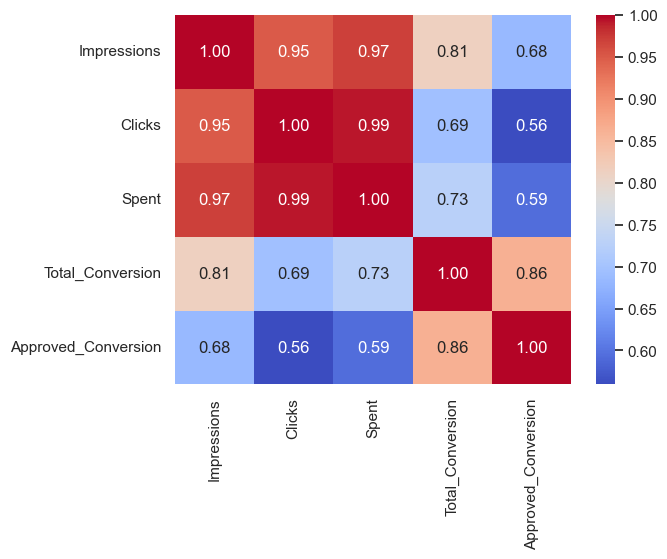

In [126]:
corr=sns.heatmap(data_frame[["Impressions","Clicks","Spent","Total_Conversion","Approved_Conversion"]].corr(),annot=True ,fmt=".2f", cmap="coolwarm")

It can be understood that impressions and  total conversion are correlated with the approved conversion than with the clicks and spent.

# **Ad-Campaigns**

In [127]:
data_frame["xyz_campaign_id"].unique()

array([ 916,  936, 1178], dtype=int64)

Three different types of ad campaigns can be seen here for xyz company. Replacing these ids with CAMPAIGN_A, CAMPAIGN_B and CAMPAIGN_C

In [128]:
data_frame["xyz_campaign_id"].replace({916:"CAMPAIGN_A",936:"CAMPAIGN_B",1178:"CAMPAIGN_C"}, inplace=True)

In [129]:
data_frame.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,CAMPAIGN_A,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,CAMPAIGN_A,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,CAMPAIGN_A,103920,30-34,M,20,693,0,0.00,1,0
3,708815,CAMPAIGN_A,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,CAMPAIGN_A,103928,30-34,M,28,4133,1,1.29,1,1


The campaign ids are changed.

# **Performing Data Vizualization**

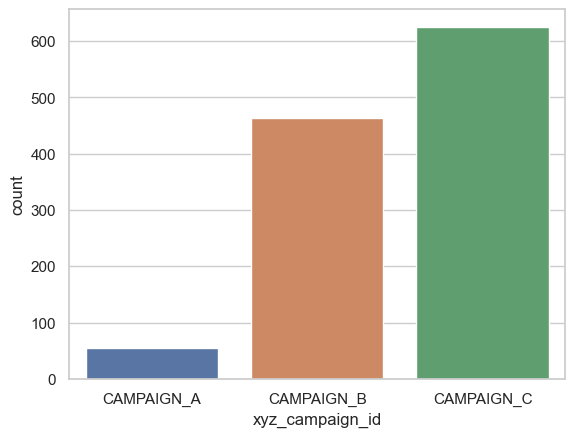

In [130]:
# visualizing count plot on single categorical variable 
sns.countplot(x ='xyz_campaign_id', data = data_frame) 
# Generating the plot 
plt.show() 

CAMPAIGN_C has more ads compared to CAMPAIGN_A and CAMPAIGN_B.

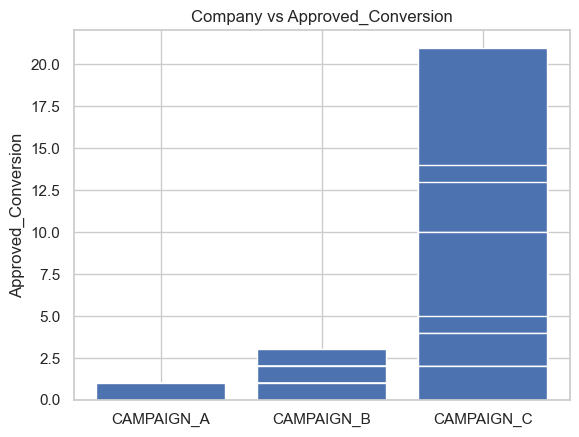

In [131]:
#Company vs Approved_Conversion
# Generating bar plot
plt.bar(data_frame["xyz_campaign_id"], data_frame["Approved_Conversion"])
plt.ylabel("Approved_Conversion")
plt.title("Company vs Approved_Conversion")
plt.show()


CAMPAIGN_C has better approved conversion count than CAMPAIGN_A and CAMPAIGN_B concluding that most people bought products from CAMPAIGN_C.


**Age**

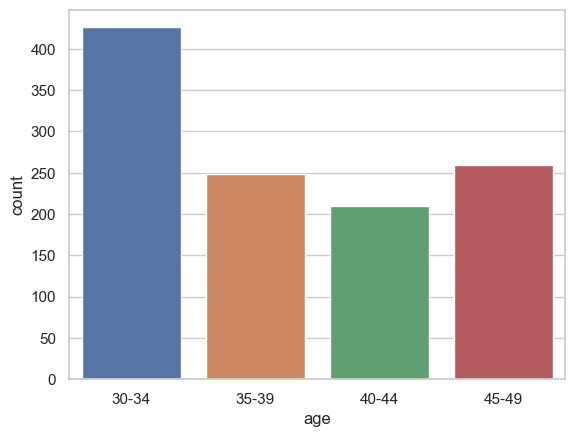

In [132]:
# count plot on single categorical variable 
sns.countplot(x ='age', data = data_frame) 
# Generating the plot 
plt.show() 

<Axes: xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

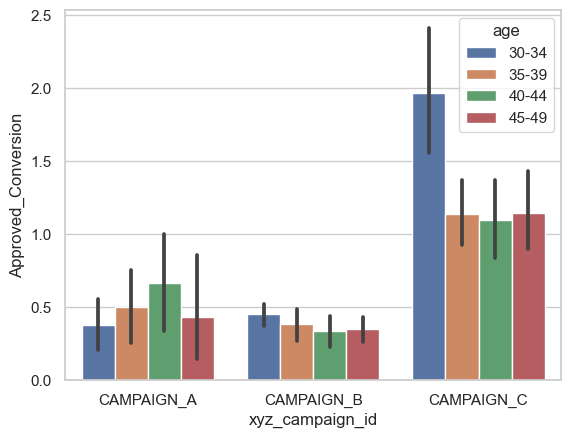

In [133]:
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
sns.barplot(x=data_frame["xyz_campaign_id"], y=data_frame["Approved_Conversion"], hue=data_frame["age"], data=tips)


30-34 age group showed more interest in CAMPAIGN_B and CAMPAIGN_C while 40-44 age group showed more interest for CAMPAIGN_A.


**Gender**

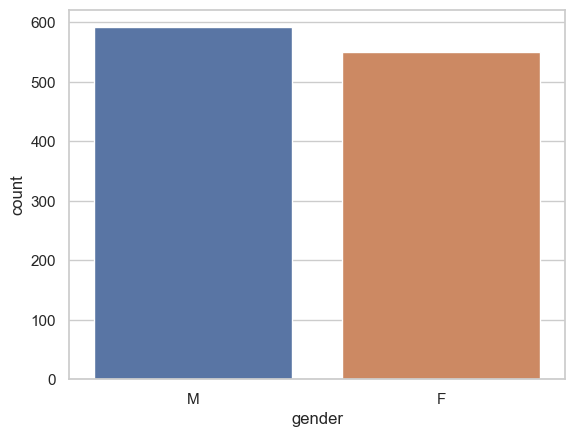

In [134]:
# count plot on single categorical variable 
sns.countplot(x ='gender', data = data_frame) 
# Generating the plot 
plt.show() 

<Axes: xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

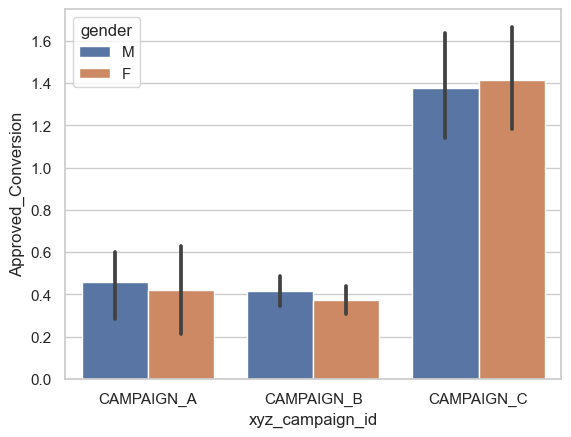

In [135]:
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
sns.barplot(x=data_frame["xyz_campaign_id"], y=data_frame["Approved_Conversion"], hue=data_frame["gender"], data=tips)

Almost both of the genders showed same interests in all the three campaigns.

**Interest**

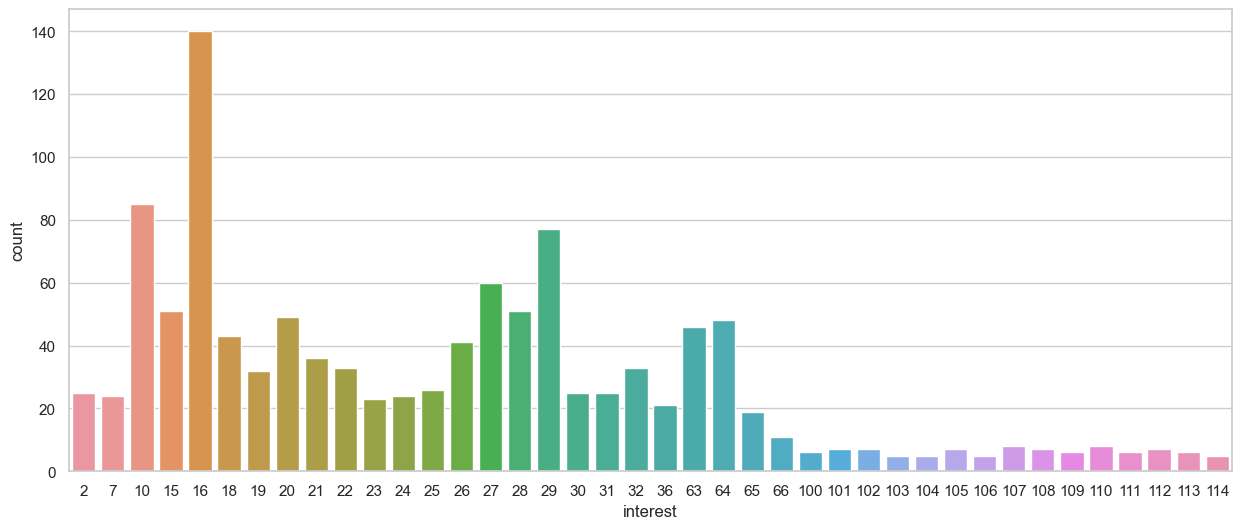

In [136]:
# count plot on single categorical variable 
fig_dims = (15,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x ='interest', data = data_frame) 
# Generating the plot 
plt.show() 

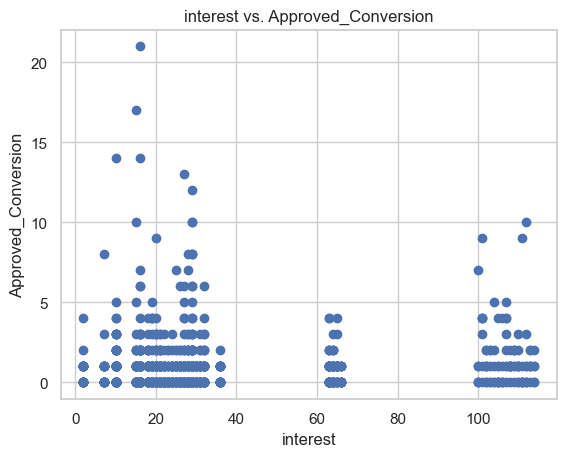

In [137]:
plt.scatter(data_frame["interest"], data_frame["Approved_Conversion"])
plt.title("interest vs. Approved_Conversion")
plt.xlabel("interest")
plt.ylabel("Approved_Conversion")
plt.show()

It's interesting to see that even while there were less people showing interest after 100, there was a spike in the number of people who made a purchase. The output of the distribution is as anticipated.

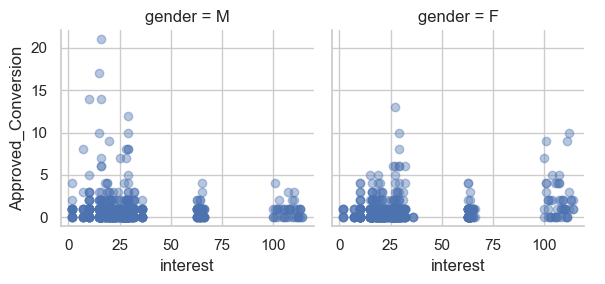

In [138]:
p = sns.FacetGrid(data_frame, col="gender")
p.map(plt.scatter, "interest", "Approved_Conversion", alpha=.4)
p.add_legend();

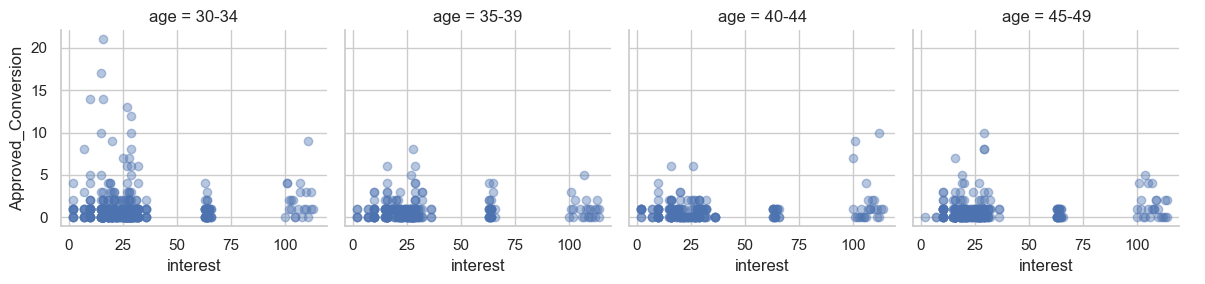

In [139]:
p = sns.FacetGrid(data_frame, col="age")
p.map(plt.scatter, "interest", "Approved_Conversion", alpha=.4)
p.add_legend();

**Spent**

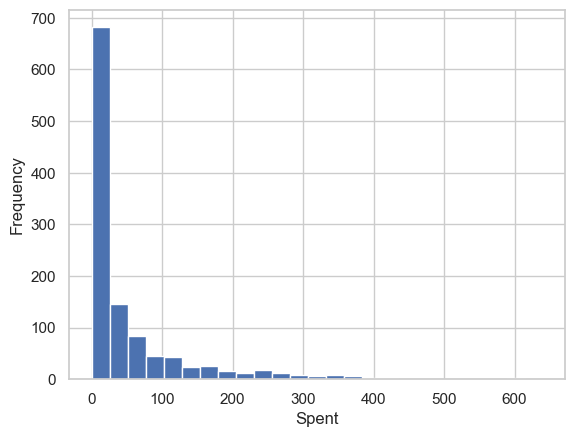

In [140]:
plt.hist(data_frame['Spent'], bins = 25)
plt.xlabel("Spent")
plt.ylabel("Frequency")
plt.show()

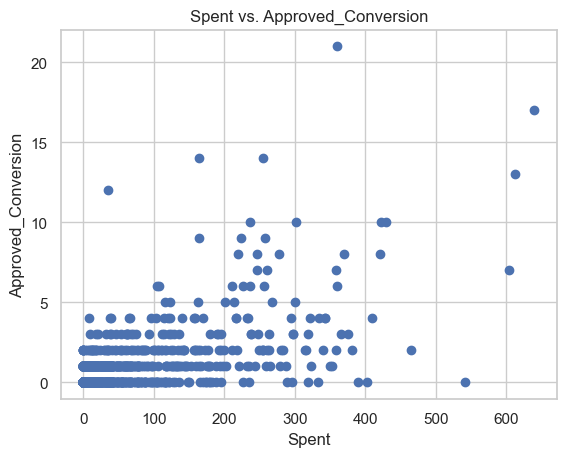

In [141]:
# spent vs approved conversion
plt.scatter(data_frame["Spent"], data_frame["Approved_Conversion"])
plt.title("Spent vs. Approved_Conversion")
plt.xlabel("Spent")
plt.ylabel("Approved_Conversion")
plt.show()

No of products bought is directly proportional to the spents

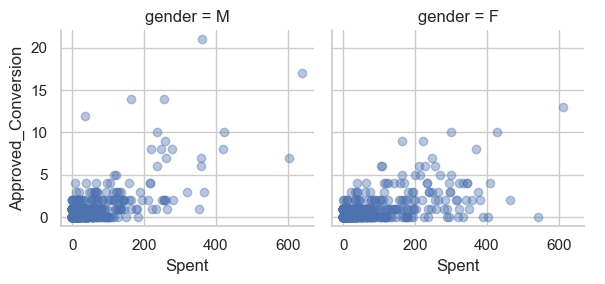

In [142]:
p = sns.FacetGrid(data_frame, col="gender")
p.map(plt.scatter, "Spent", "Approved_Conversion", alpha=.4)
p.add_legend();

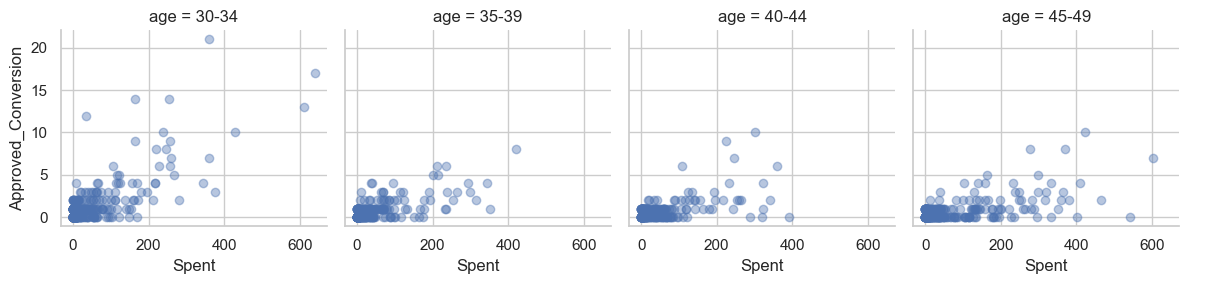

In [143]:
# Creating a FacetGrid with the column variable as age
p = sns.FacetGrid(data_frame, col="age")

# mapping Scatter plot for Spent vs Approved Conversion for each age group 
p.map(plt.scatter, "Spent", "Approved_Conversion", alpha=.4)

# Giving legend for plot
p.add_legend()


**Impressions**

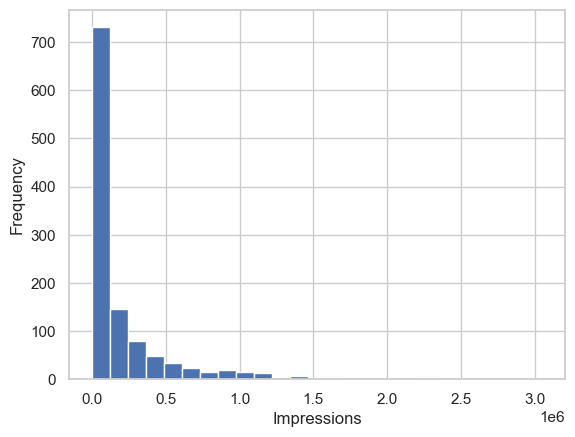

In [144]:
plt.hist(data_frame['Impressions'], bins = 25)
plt.xlabel("Impressions")
plt.ylabel("Frequency")
plt.show()

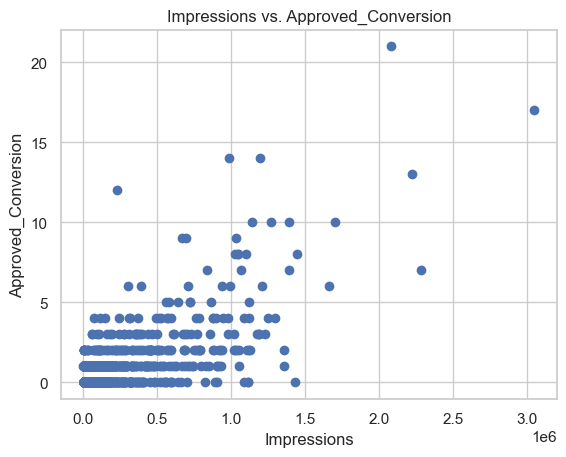

In [145]:
plt.scatter(data_frame["Impressions"], data_frame["Approved_Conversion"])
plt.title("Impressions vs. Approved_Conversion")
plt.xlabel("Impressions")
plt.ylabel("Approved_Conversion")
plt.show()

It can be observed that after some point in impressions the approved conversions is increased.

# **Checking who bought the product actually**

**Clicking on the ad ?**

Checking who actually bought the product after clicking on the ad.

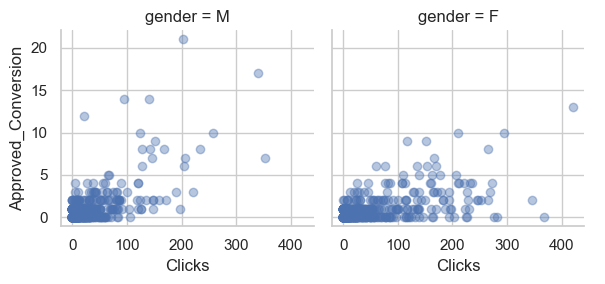

In [146]:
p = sns.FacetGrid(data_frame, col="gender")
p.map(plt.scatter, "Clicks", "Approved_Conversion", alpha=.4)
p.add_legend();

Men clicked on the ad more than women but women ended up buying the product more than men.

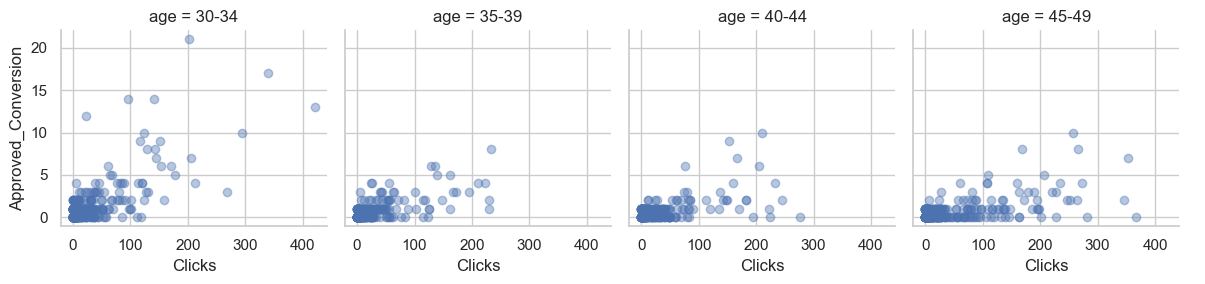

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a FacetGrid with the column variable as age
p = sns.FacetGrid(data_frame, col="age")

# Mapping scatter plot of Clicks vs Approved_Conversion for each age group
p.map(plt.scatter, "Clicks", "Approved_Conversion", alpha=.4)

# Giving legend for plot
p.add_legend()


30-34 age group people tend to buy the product after clicking the ad. 

**Enquiring about the product?**

Checking who actually bought the product after enquiring about the ad.

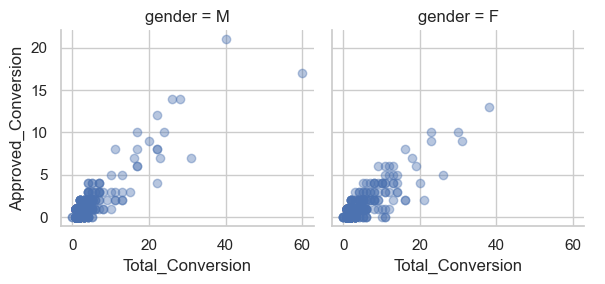

In [148]:
p = sns.FacetGrid(data_frame, col="gender")
p.map(plt.scatter, "Total_Conversion", "Approved_Conversion", alpha=.4)
p.add_legend();

Men enquired about the ad more than women but women ended up buying the product more than men.

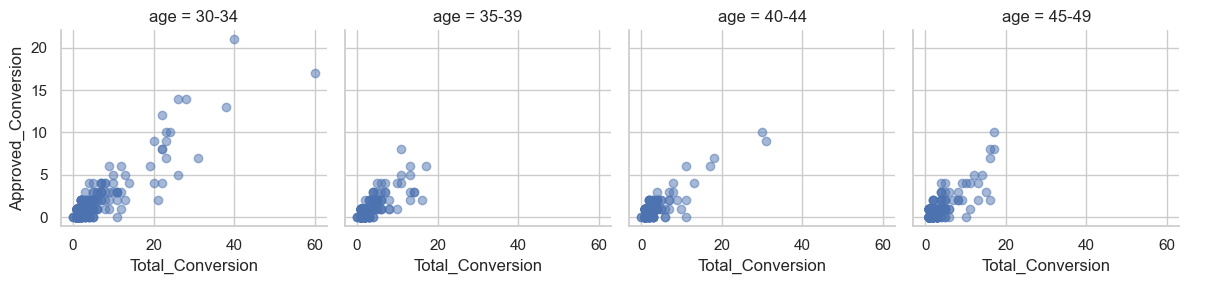

In [149]:
p = sns.FacetGrid(data_frame, col="age")
p.map(plt.scatter, "Total_Conversion", "Approved_Conversion",alpha=.5)
p.add_legend()

30-34 age group people tend to buy the product after enquiring about the ad. 

# **Zoom-in the campaign which has the most approved conversion (Campaign_C)**

In [150]:
c_a=[]
c_b=[]
c_c=[]
for i,j,k in zip(data_frame.xyz_campaign_id, data_frame.fb_campaign_id, data_frame.Approved_Conversion):
    if i=="CAMPAIGN_C":
        c_a.append(i),c_b.append(j),c_c.append(k)

In [151]:
z={'campaign_name':c_a, 'fb_campaign_id':c_b, 'Approved_Conversion':c_c}     
c_campaign=pd.DataFrame(z)
c_campaign.head()

,campaign_name,fb_campaign_id,Approved_Conversion
0,CAMPAIGN_C,144531,14
1,CAMPAIGN_C,144531,5
2,CAMPAIGN_C,144531,1
3,CAMPAIGN_C,144531,2
4,CAMPAIGN_C,144531,2


**Distribution of the fb campaign id along with the Approved Conversion for CAMPAIGN_C**

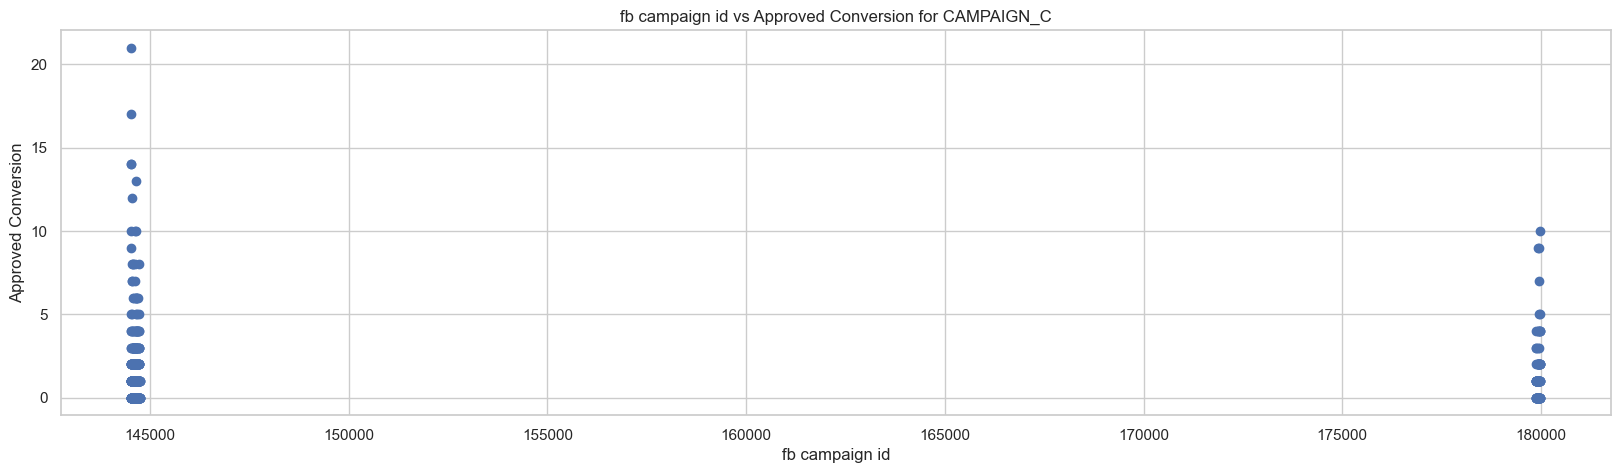

In [152]:
plt.figure(figsize=(20,5))
plt.scatter(c_campaign["fb_campaign_id"], c_campaign["Approved_Conversion"])
plt.title("fb campaign id vs Approved Conversion for CAMPAIGN_C")
plt.xlabel("fb campaign id")
plt.ylabel("Approved Conversion")
plt.show()

The fb campaign ids are approximately 145000 which has more approved conversion and for campaign c it was around 180000.

# **Conclusion**

**Correlations analysis**:
Impressions and  total conversion are correlated with the approved conversion than with the clicks and spent.

**Campaign_C**:
CAMPAIGN_C has more ads.
CAMPAIGN_C has better approved conversion count than CAMPAIGN_A and CAMPAIGN_B concluding that most people bought products from CAMPAIGN_C.

**age_group**: 30-34 age group showed more interest in CAMPAIGN_B and CAMPAIGN_C while 40-44 age group showed more interest for CAMPAIGN_A.

**gender**: Almost both of the genders showed same interests in all the three campaigns.

**interest**: It's interesting to see that even while there were less people showing interest after 100, there was a spike in the number of people who made a purchase. The output of the distribution is as anticipated.

**money spent**: No of products bought is directly proportional to the spent.

**Product bought after clicking the ad**: Men clicked on the ad more than women but women ended up buying the product more than men. 30-34 age group people tend to buy the product after clicking the ad. 

**Product bought after enquiring the ad**: Men enquired about the ad more than women but women ended up buying the product more than men. 30-34 age group people tend to buy the product after enquiring about the ad.

**Conclusion:**

The fb campaign ids are approximately 145000 which has more approved conversion and for campaign c it was around 180000.


# **Modelling to train the data**

**Actual ids are assigned to the xyz_campaign_id for the modelling purpose**

In [171]:
data_frame["xyz_campaign_id"].replace({"CAMPAIGN_A":916 ,"CAMPAIGN_B":936 ,"CAMPAIGN_C":1178}, inplace=True)

**Encoding of the 'gender' and 'age' (labels) for modelling**

In [172]:
#encoding the genders
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(data_frame["gender"])
data_frame["gender"]=encoder.transform(data_frame["gender"])
print(data_frame["gender"])

0       1
1       1
2       1
3       1
4       1
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: gender, Length: 1143, dtype: int64


In [173]:
#encoding the age
encoder.fit(data_frame["age"])
data_frame["age"]=encoder.transform(data_frame["age"])
print(data_frame["age"])

0       0
1       0
2       0
3       0
4       0
       ..
1138    3
1139    3
1140    3
1141    3
1142    3
Name: age, Length: 1143, dtype: int64


In [174]:
data_frame.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,0,1,15,7350,1,1.43,2,1
1,708749,916,103917,0,1,16,17861,2,1.82,2,0
2,708771,916,103920,0,1,20,693,0,0.00,1,0
3,708815,916,103928,0,1,28,4259,1,1.25,1,0
4,708818,916,103928,0,1,28,4133,1,1.29,1,1


**Deleting "Approved_Conversion" and "Total_Conversion" from dataset**

In [175]:
x=np.array(data_frame.drop(labels=["Approved_Conversion","Total_Conversion"], axis=1))
y=np.array(data_frame["Total_Conversion"])

In [176]:
x

array([[7.08746000e+05, 9.16000000e+02, 1.03916000e+05, ...,
        7.35000000e+03, 1.00000000e+00, 1.42999995e+00],
       [7.08749000e+05, 9.16000000e+02, 1.03917000e+05, ...,
        1.78610000e+04, 2.00000000e+00, 1.82000002e+00],
       [7.08771000e+05, 9.16000000e+02, 1.03920000e+05, ...,
        6.93000000e+02, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.31441200e+06, 1.17800000e+03, 1.79979000e+05, ...,
        1.51531000e+05, 2.80000000e+01, 4.02899995e+01],
       [1.31441400e+06, 1.17800000e+03, 1.79981000e+05, ...,
        7.90253000e+05, 1.35000000e+02, 1.98710001e+02],
       [1.31441500e+06, 1.17800000e+03, 1.79982000e+05, ...,
        5.13161000e+05, 1.14000000e+02, 1.65609999e+02]])

In [177]:
y

array([2, 2, 1, ..., 2, 8, 5], dtype=int64)

In [178]:
y=y.reshape(len(y),1)
y

array([[2],
       [2],
       [1],
       ...,
       [2],
       [8],
       [5]], dtype=int64)

**Feature Scaling**

In [179]:
from sklearn.preprocessing import StandardScaler
x_sc= StandardScaler()
x = x_sc.fit_transform(x)

**splitting Data into testset and trainset**

In [180]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

# **Random Forest Classifier to predict Total_Conversion**

In [181]:
from sklearn.ensemble import RandomForestClassifier
random_fr = RandomForestClassifier(n_estimators = 10, random_state = 0)
random_fr.fit(x_train, y_train)

C:\Users\sharw\AppData\Local\Temp\ipykernel_13804\2387042488.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_fr.fit(x_train, y_train)


RandomForestClassifier(n_estimators=10, random_state=0)

**Predicting Total Conversion in test_set**

In [182]:
# Make predictions on the test set
y_pred = random_fr.predict(x_test)

In [183]:
y_pred

array([ 1,  4,  1,  2,  1,  4,  1,  1,  1,  1,  1, 13,  2,  1,  2,  1,  1,
        2,  1,  2,  4,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  2,  1,  1,  1,  1,  2,  3,  1,  1,  1,  1,  3,  0,
        1,  1,  2,  1,  1,  2,  5,  2,  1,  1,  2,  1,  1,  3,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,  1,
        1,  1,  1, 24,  1,  1,  2,  1,  4,  1,  1,  4,  1,  1,  1,  3,  2,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  2,
        1,  3,  1,  1,  1, 17,  4,  3,  1,  3,  1,  1,  1,  2,  1,  1,  1,
        1,  1,  1,  6,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, 22,  1,  3,  1,  2,  1,  4,  1,  1,  1, 16,  2,  1,  1,  1,
        3, 22,  5,  3,  1,  2,  1,  1,  1, 11,  1,  1,  1, 11,  1,  1,  2,
        1,  1,  1,  1,  1,  1,  1,  1,  6,  3,  3,  1,  2,  1,  1,  1,  1,
        7,  2,  1,  7,  8,  1,  1,  1,  1,  2,  1,  2,  1,  1,  1,  1,  5,
        1,  1,  3,  1,  1

# **Evaluation**

In [184]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,accuracy_score
mean_abs_error=mean_absolute_error(y_test, y_pred)
mean_sqr_error=mean_squared_error(y_test, y_pred)
r_mean_sqr_error=np.sqrt(mean_sqr_error)
r2_s=r2_score(y_test, y_pred)
a_s=accuracy_score(y_test, y_pred)


In [185]:
mean_abs_error

1.346938775510204

The mean absolute error achieved is 1.346.

In [186]:
#R-squred value
r2_s

0.5382662207706701

53.8% of the data will be fitting into the classifier model as the r2 score is achieved as 0.538.

In [187]:
a_s

0.5685131195335277

The accuracy is achieved as 0.568 which means the model is less accurate for the dataset.

# **Decision Tree Classifier**

In [188]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
import pandas as pd
from sklearn import tree
decision_tree_clf= DecisionTreeClassifier()

In [189]:
# Train the decision tree classifier
decision_tree_clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [190]:
# Make predictions on the test set
y_pred =decision_tree_clf.predict(x_test)
y_pred

array([ 1,  2,  1,  1,  1,  4,  1,  1,  1,  1,  1,  5,  3,  1,  1,  1,  1,
        3,  3,  5, 20,  2,  1,  6,  1,  1,  3,  1,  1,  1,  2,  1,  1,  1,
        1,  1,  1,  1,  2,  1,  1,  1,  0,  1, 21,  1,  1,  1,  2, 18,  4,
        1,  1,  1,  1,  1,  6,  5,  1,  1,  1,  4,  1,  1,  3,  1,  1,  4,
        1,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  2,  2,  1,  7,  1,
        5,  6,  2, 20,  1,  1,  2,  2,  4,  1,  1, 31,  1,  1,  1,  3,  1,
        1,  1,  1,  1,  1,  1,  6,  2,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        1,  3,  1,  1,  1, 23, 23,  3,  1,  4,  1,  2,  1,  8,  1,  1,  1,
        2,  1,  1,  6,  1,  2,  1,  2,  1,  1,  1,  1,  3,  2,  1,  1,  1,
        1,  1, 31,  1,  4,  2,  4,  1,  2,  1,  1,  1,  6,  2,  2,  1,  1,
        3, 22, 22,  2,  1,  2,  1,  1,  1, 11,  3,  1,  1, 22,  1,  1,  5,
        1,  2,  1,  1,  1,  1,  1,  4,  6,  5,  3,  1,  4,  3,  1,  1,  1,
       17,  2,  1,  5,  8,  1,  1,  1,  1,  3,  1,  1,  1,  1,  1,  1,  7,
        1,  2,  3,  1,  1

In [191]:
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
#precision = precision_score(y_test,y_pred)
#print(precision)

Accuracy: 0.5276967930029155


The accuracy for decision tree classifier is 0.527